# GPT Manual Cross Validation:
nums pulled from sheets: 
https://docs.google.com/spreadsheets/d/1z8Lm5_pE_g_zPnXJCuHm_Tm1s-f3LrYAsWVHIWqetA4/edit#gid=1359730845


Author: Josie R


In [8]:
import pandas as pd

In [89]:
data = {'Dis/Agreement Level': ['Correct', 'Incorrect', 'Maybe'],
        'Female': [78, 3, 6],
        'Male': [131, 26, 25]
        }
 
# Create DataFrame of agreement levels with human-raters and GPT rating
df = pd.DataFrame(data)
 
print(df)

  Dis/Agreement Level  Female  Male
0             Correct      78   131
1           Incorrect       3    26
2               Maybe       6    25


In [71]:
f = 78/87
print(f)
m= 131/187
print(m)

print((78+131)/(78+3+6+131+26+25)) #percent we said correct


#percent by chance, multiply the two 
print(m*f)

0.896551724137931
0.7005347593582888
0.7769516728624535
0.6280656463212244


<Axes: >

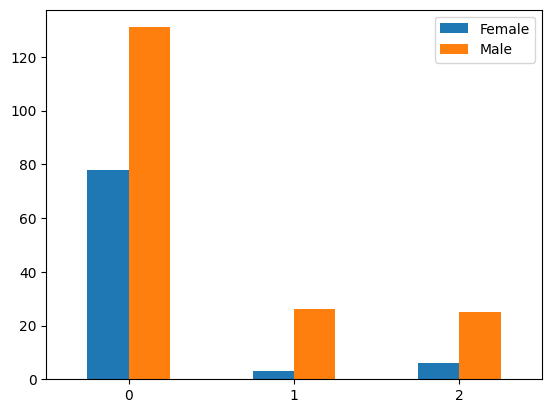

In [90]:
df.plot.bar(rot=0)

In [12]:
import matplotlib.pyplot as plt

In [91]:
df

,Dis/Agreement Level,Female,Male
0,Correct,78,131
1,Incorrect,3,26
2,Maybe,6,25


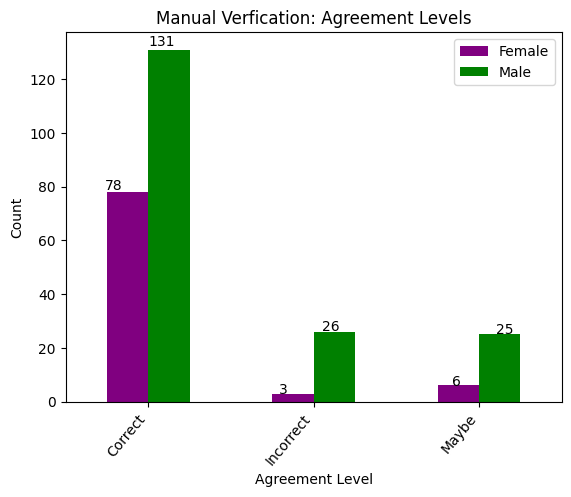

In [92]:
colors = ['purple', 'green']
ax = df.plot.bar(x='Dis/Agreement Level', rot=0, color=colors)

ax.set_xlabel("Agreement Level")
ax.set_ylabel("Count")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.010))

#plt.legend(loc='upper left')
plt.title(f"Manual Verfication: Agreement Levels")
plt.xticks(rotation=50, ha='right')


plt.show()

In [45]:
df

,Dis/Agreement Level,Female,Male
0,Correct,78,131
1,Incorrect,3,26
2,Maybe,6,25


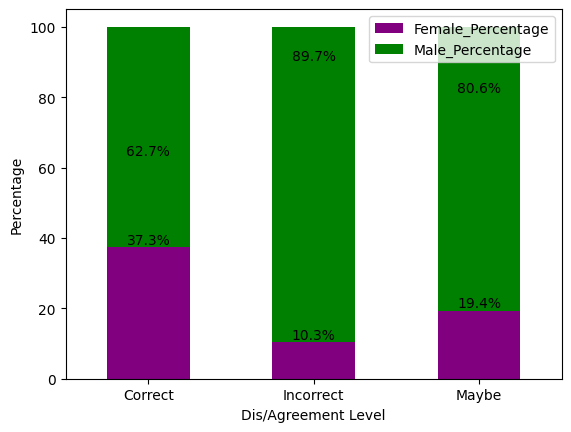

In [49]:
df['Total'] = df['Female'] + df['Male']

df['Female_Percentage'] = (df['Female'] / df['Total']) * 100
df['Male_Percentage'] = (df['Male'] / df['Total']) * 100

colors = ['purple', 'green']
ax = df.plot.bar(x='Dis/Agreement Level', y=['Female_Percentage', 'Male_Percentage'], 
                 rot=0, color=colors, stacked=True)

ax.set_xlabel("Dis/Agreement Level")
ax.set_ylabel("Percentage")

#labels
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

plt.show()

In [50]:
df

,Dis/Agreement Level,Female,Male,Total,Female_Percentage,Male_Percentage
0,Correct,78,131,209,37.320574,62.679426
1,Incorrect,3,26,29,10.344828,89.655172
2,Maybe,6,25,31,19.354839,80.645161


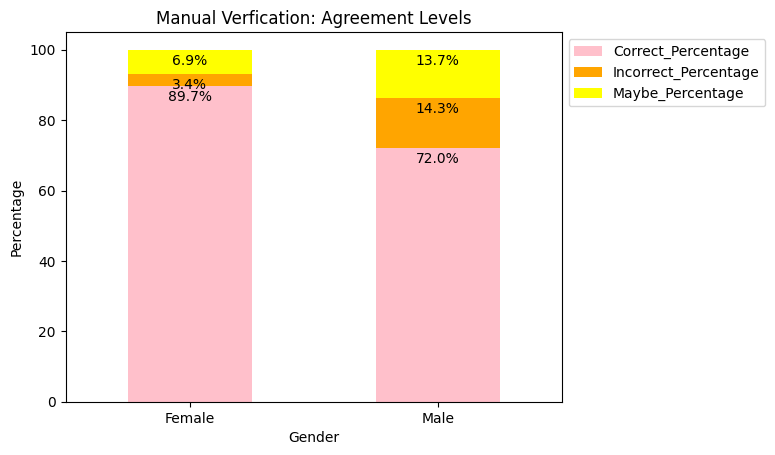

In [93]:
data2 = {'Gender': ['Female', 'Male'],
        'Correct': [78, 131],
        'Incorrect': [3, 26],
        'Maybe': [6, 25]
        }

df = pd.DataFrame(data2)


df['Total'] = df['Correct'] + df['Incorrect'] + df['Maybe']

df['Correct_Percentage'] = (df['Correct'] / df['Total']) * 100
df['Incorrect_Percentage'] = (df['Incorrect'] / df['Total']) * 100
df['Maybe_Percentage'] = (df['Maybe'] / df['Total']) * 100

colors = ['pink', 'orange', 'yellow']
ax = df.plot.bar(x='Gender', y=['Correct_Percentage', 'Incorrect_Percentage', 'Maybe_Percentage'], 
                 rot=0, color=colors, stacked=True)

ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")


#labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height - 5), ha='center', va='bottom')


plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.title(f"Manual Verfication: Agreement Levels")


plt.show()


